In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_excel('cars.xlsx')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [5]:
def unique_values(df):
    x = df.columns
    for i in x:
        print(i)
        print()
        print(df[i].unique())
        print(*'-'*20)
unique_values(df)

symboling

[ 3  1  2  0 -1 -2]
- - - - - - - - - - - - - - - - - - - -
normalized-losses

['?' 164 158 192 188 121 98 81 118 148 110 145 137 101 78 106 85 107 104
 113 150 129 115 93 142 161 153 125 128 122 103 168 108 194 231 119 154 74
 186 83 102 89 87 77 91 134 65 197 90 94 256 95]
- - - - - - - - - - - - - - - - - - - -
make

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
- - - - - - - - - - - - - - - - - - - -
fuel-type

['gas' 'diesel']
- - - - - - - - - - - - - - - - - - - -
body-style

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
- - - - - - - - - - - - - - - - - - - -
drive-wheels

['rwd' 'fwd' '4wd']
- - - - - - - - - - - - - - - - - - - -
engine-location

['front' 'rear']
- - - - - - - - - - - - - - - - - - - -
width

[64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64

In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df["normalized-losses"].astype(float)

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [8]:
df['normalized-losses'].replace(np.nan,df['normalized-losses'].astype(float).median(),inplace=True)

In [9]:
df['normalized-losses'].astype(float)

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

<Axes: xlabel='normalized-losses', ylabel='Density'>

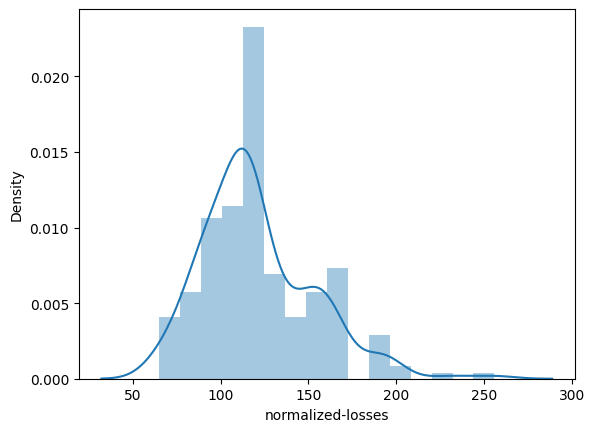

In [10]:
sns.distplot(df['normalized-losses'])

In [11]:
df['horsepower'].replace(np.nan,df['horsepower'].astype(float).median(),inplace=True)

In [12]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [13]:
def boxplot(df):
  plt.figure(figsize=(12,5))
  sns.boxplot(y=df["make"],x=df["price"])

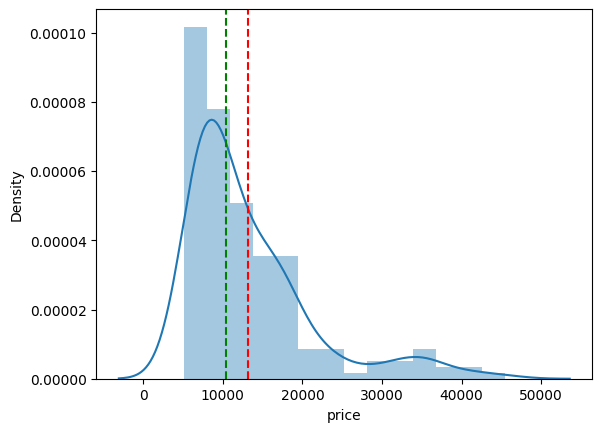

In [14]:
mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()
sns.distplot(df['price'])
plt.axvline(mean,color='red',linestyle='--',label='mean')
plt.axvline(median,color='green',linestyle='--',label='median')

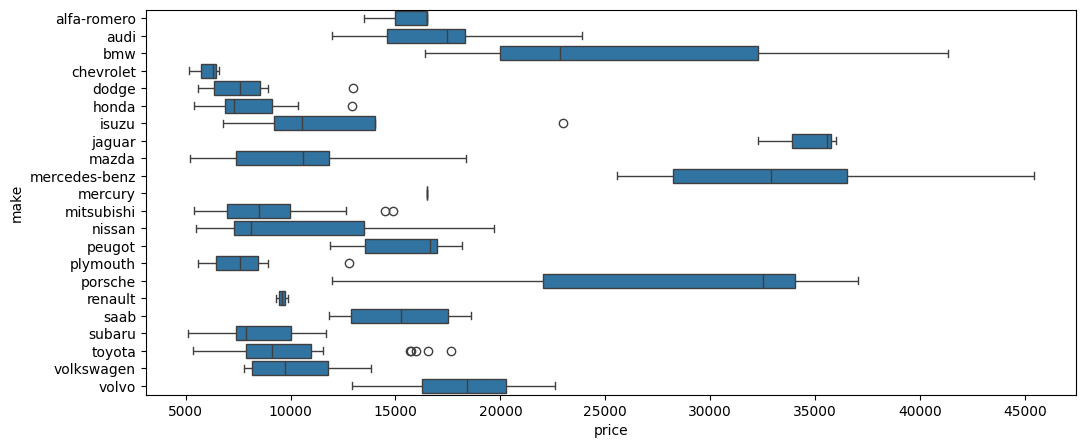

In [15]:
boxplot(df)

In [16]:
toyota_car_data = df[(df['make'] == 'toyota') & (df['price'] > 15000)]
toyota_car_index = list(toyota_car_data.index)
toyota_car_index
df.drop(index = toyota_car_index , inplace=True)

dodge_car_data = df[(df['make'] == 'dodge') & (df['price'] > 12000)]
dodge_car_index = list(dodge_car_data.index)
dodge_car_index
df.drop(index = dodge_car_index , inplace=True)

honda_car_data = df[(df['make'] == 'honda') & (df['price'] > 12500)]
honda_car_index = list(honda_car_data.index)
honda_car_index
df.drop(index = honda_car_index , inplace=True)

isuzu_car_data = df[(df['make'] == 'isuzu') & (df['price'] > 20000)]
isuzu_car_index = list(isuzu_car_data.index)
isuzu_car_index
df.drop(index = isuzu_car_index , inplace=True)

mitsubishi_car_data = df[(df['make'] == 'mitsubishi') & (df['price'] > 14000)]
mitsubishi_car_index = list(mitsubishi_car_data.index)
mitsubishi_car_index
df.drop(index = mitsubishi_car_index , inplace=True)

plymouth_car_data = df[(df['make'] == 'plymouth') & (df['price'] > 10000)]
plymouth_car_index = list(plymouth_car_data.index)
plymouth_car_index
df.drop(index = plymouth_car_index , inplace=True)

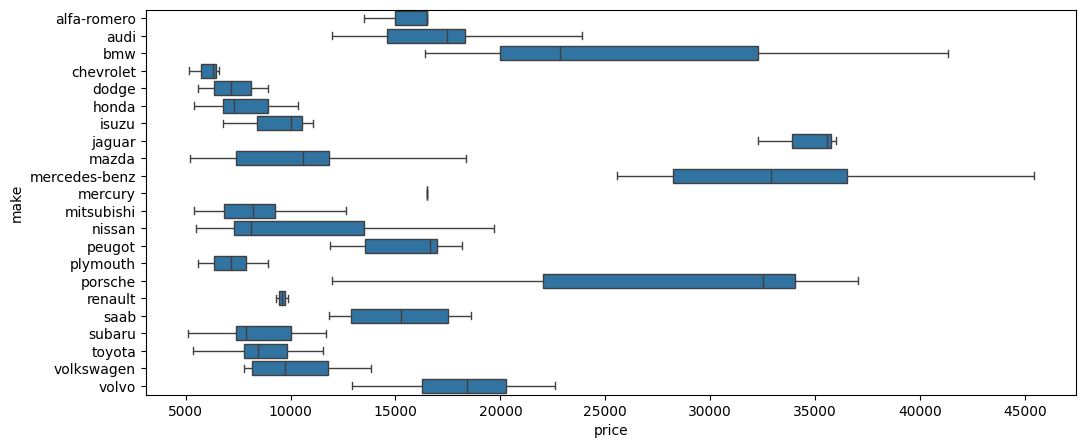

In [17]:
boxplot(df)

In [18]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [19]:
df['normalized-losses'] = df['normalized-losses'].astype(int)


In [20]:
num_df = df.select_dtypes(exclude='object')
obj_df = df.select_dtypes(include='object')
obj_df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [21]:
le = LabelEncoder()
for i in obj_df.columns:
  obj_df[i] = le.fit_transform(obj_df[i])

In [22]:
obj_df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [23]:
dict1 ={'car':[0,1,0,0,1],'km':[100,200,300,400,500]}
d= pd.DataFrame(dict1)
d

,car,km
0,0,100
1,1,200
2,0,300
3,0,400
4,1,500


In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [25]:
ss.fit_transform(d)

array([[-0.81649658, -1.41421356],
       [ 1.22474487, -0.70710678],
       [-0.81649658,  0.        ],
       [-0.81649658,  0.70710678],
       [ 1.22474487,  1.41421356]])

In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [27]:
ms.fit_transform(d)

array([[0.  , 0.  ],
       [1.  , 0.25],
       [0.  , 0.5 ],
       [0.  , 0.75],
       [1.  , 1.  ]])

In [28]:
num_df

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,115,64.1,48.8,130,111.0,21,27,13495
1,3,115,64.1,48.8,130,111.0,21,27,16500
2,1,115,65.5,52.4,152,154.0,19,26,16500
3,2,164,66.2,54.3,109,102.0,24,30,13950
4,2,164,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95,68.9,55.5,141,114.0,23,28,16845
201,-1,95,68.8,55.5,141,160.0,19,25,19045
202,-1,95,68.9,55.5,173,134.0,18,23,21485
203,-1,95,68.9,55.5,145,106.0,26,27,22470


In [29]:
df['area']= df['height']*df["width"]

In [30]:
df_new = pd.concat([num_df,obj_df],axis=1)

In [31]:
df_new

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,115,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,115,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,115,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,68.9,55.5,141,114.0,23,28,16845,21,1,3,2,0,3
201,-1,95,68.8,55.5,141,160.0,19,25,19045,21,1,3,2,0,3
202,-1,95,68.9,55.5,173,134.0,18,23,21485,21,1,3,2,0,5
203,-1,95,68.9,55.5,145,106.0,26,27,22470,21,0,3,2,0,3


In [32]:
df_new['area']= df_new['height']*df_new["width"]

In [33]:
df_new=df_new.drop(["width","height"],axis=1)

In [34]:
df_new

,symboling,normalized-losses,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,3,115,130,111.0,21,27,13495,0,1,0,2,0,0,3128.08
1,3,115,130,111.0,21,27,16500,0,1,0,2,0,0,3128.08
2,1,115,152,154.0,19,26,16500,0,1,2,2,0,5,3432.20
3,2,164,109,102.0,24,30,13950,1,1,3,1,0,3,3594.66
4,2,164,136,115.0,18,22,17450,1,1,3,0,0,3,3605.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,141,114.0,23,28,16845,21,1,3,2,0,3,3823.95
201,-1,95,141,160.0,19,25,19045,21,1,3,2,0,3,3818.40
202,-1,95,173,134.0,18,23,21485,21,1,3,2,0,5,3823.95
203,-1,95,145,106.0,26,27,22470,21,0,3,2,0,3,3823.95
